# Breadth first search (BFS) and Deep first seach (DFS) in Python

![BFS and DFS](https://images.unsplash.com/photo-1597733336794-12d05021d510?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1074&q=80)


photo by [JJ Ying](https://unsplash.com/@jjying) at [Unsplash](https://unsplash.com/)


## Introduction

This is the companion colab code for my tutorial in medium aboutBreadth first search (BFS) and Deep first seach (DFS) in Python, please read the article for better understanding of the code.
this is a colab notebook, you can test in colab (all the code has been tested and you do not need to set your machine)

[article](https://)

In [ ]:
#define a graph
graph = {
  '1' : ['2','3'],
  '2' : [ '4', '3'],
  '3' : [ '7', '8'],
  '4' : ['5', '3'],
  '5' : ['6'],
  '6' : [],
  '7' : [ '8'],
  '8' : []
}

#implementation in python
def bfs(graph, source_node):
  """
  breadth first search
  Visited = list of visited nodes
  queque = list of node to visit
  source_node = node from where to start the search
  """
  visited = []
  queue = []
  visited.append(source_node)
  queue.append(source_node)

  while queue:
    s = queue.pop(0)

    for neighbour in graph[s]:
      if neighbour not in visited:
        visited.append(neighbour)
        queue.append(neighbour)
  return visited

# Breadth first search
bfs( graph, '1')

['1', '2', '3', '4', '7', '8', '5', '6']

In [ ]:
#notice that is using recursion
visited = set()
path = []
def dfs(visited, graph, node):
    """
    Deep first search
    Visited = list of visited nodes
    node = node from where to start the search
    """

    if node not in visited:
        path.append(node)
        visited.add(node)
        for neighbour in graph[node]:
            dfs(visited, graph, neighbour)
    return path

dfs(visited, graph, '1')

['1', '2', '4', '5', '6', '3', '7', '8']

In [ ]:
#code to avoid recursion
def dfs_nonrecursive(graph, start):
    """
    Deep first search
    --with no recursion--
    """
    stack, path = [start], []

    while stack:
        vertex = stack.pop()
        if vertex in path:
            continue
        path.append(vertex)
        for neighbor in graph[vertex]:
            stack.append(neighbor)

    return path
print(dfs_nonrecursive(graph, "1"))

['1', '3', '8', '7', '2', '4', '5', '6']


# Implement BFS and DFS with Networkx

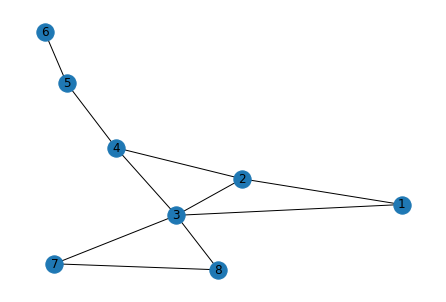

In [ ]:
#code to implement with networkx
import networkx as nx

graph = {
  '1' : ['2','3'],
  '2' : [ '4', '3'],
  '3' : [ '7', '8'],
  '4' : ['5', '3'],
  '5' : ['6'],
  '6' : [],
  '7' : [ '8'],
  '8' : []
}
G = nx.Graph(graph)
nx.draw(G , with_labels= True)

In [ ]:
source = "1"
path = nx.bfs_edges(G, source)
visited = [source] + [v for u, v in path]
visited

['1', '2', '3', '4', '7', '8', '5', '6']

In [ ]:
source = "1"
path = nx.dfs_edges(G, source)
visited = [source] + [v for u, v in path]
visited

['1', '2', '4', '5', '6', '3', '7', '8']

In [ ]:
import time
start_time = time.time()
path = nx.bfs_edges(G, source)
print("--- Time execution BFS: %s seconds ---" % (time.time() - start_time))
start_time = time.time()
path = nx.dfs_edges(G, source)
print("--- Time execution DFS: %s seconds ---" % (time.time() - start_time))

--- Time execution BFS: 8.630752563476562e-05 seconds ---
--- Time execution DFS: 9.918212890625e-05 seconds ---


# Implement BFS and DFS with iGraph

In [ ]:
!pip install igraph
!apt install libcairo2-dev
!pip install pycairo

     |████████████████████████████████| 3.1 MB 4.6 MB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libcairo-script-interpreter2 libpixman-1-dev libxcb-shm0-dev
Suggested packages:
  libcairo2-doc
The following NEW packages will be installed:
  libcairo-script-interpreter2 libcairo2-dev libpixman-1-dev libxcb-shm0-dev
0 upgraded, 4 newly installed, 0 to remove and 39 not upgraded.
Need to get 930 kB of archives.
After this operation, 3,986 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libcairo-script-interpreter2 amd64 1.15.10-2ubuntu0.1 [53.5 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libpixman-1-dev amd64 0.34.0-2 [244 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libxcb-shm0-dev amd64 1.13-2~ubuntu18.04 [6,684 B]
Get:4 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64

In [ ]:
from igraph import *
#print(igraph.__version__)

In [ ]:
#let's make the graph in Python Igraph
graph = {
  '1' : ['2','3'],
  '2' : [ '4', '3'],
  '3' : [ '7', '8'],
  '4' : ['5', '3'],
  '5' : ['6'],
  '6' : [],
  '7' : [ '8'],
  '8' : []
}
mvi= {'1': 1, '2': 2, '3': 3, '4': 4,'5': 5, '6': 6, '7': 7, '8': 4}
G= Graph(edges= [(mvi[v], mvi[a]) for v in graph.keys() for a in graph[v]])

In [ ]:
[vertices, layers, parents] = G.bfs(1)
#path
vertices

[1, 2, 3, 4, 7, 5, 6]

In [ ]:
[vertices,  parents] = G.dfs(1)
#path
vertices

[1, 3, 7, 4, 5, 6, 2]

In [ ]:
import time
start_time = time.time()
[vertices, layers, parents] = G.bfs(1)
print("--- Time execution BFS: %s seconds ---" % (time.time() - start_time))
start_time = time.time()
[vertices,  parents] = G.dfs(1)
print("--- Time execution DFS: %s seconds ---" % (time.time() - start_time))

--- Time execution BFS: 0.0001499652862548828 seconds ---
--- Time execution DFS: 0.0001430511474609375 seconds ---
